In [20]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot
import cmaps
import salem
import math

In [10]:
data = xr.open_dataset('D:/ENSO_salinity/data/sea_level/sea_level_1990_2020/halosteric_sea_level_2000_anomaly_1990_2020.nc')
halo = data.salinity
halo = halo*1000
halo = halo.groupby('time.year').mean()

data = xr.open_dataset('D:/ENSO_salinity/data/sea_level/sea_level_1990_2020/thermosteric_sea_level_2000_anomaly_1990_2020.nc')
therm = data.__xarray_dataarray_variable__
therm = therm*1000
therm = therm.groupby('time.year').mean()

data = xr.open_dataset('D:/ENSO_salinity/data/sea_level/sea_level_1990_2020/steric_sea_level_2000_anomaly_1990_2020.nc')
steric = data.__xarray_dataarray_variable__
steric = steric*1000
steric = steric.groupby('time.year').mean()

In [11]:
Indian_shp = salem.read_shapefile(r'D:/ENSO_salinity/ocean_shp/Indian/iho.shp')
Pacific_shp = salem.read_shapefile(r'D:/ENSO_salinity/ocean_shp/Pacific/Export_Output_5.shp')
Atlantic_shp = salem.read_shapefile(r'D:/ENSO_salinity/ocean_shp/Atlantic/Export_Output.shp')

In [12]:
steric_all = [halo,therm,steric]
Pacific_area_all = [];Indian_area_all=[];Atlantic_area_all=[]
for i in range(0,3):
    Pacific_area = steric_all[i].salem.roi(shape=Pacific_shp)
    Pacific_area_all.append(Pacific_area)
    Indian_area = steric_all[i].salem.roi(shape=Indian_shp)
    Indian_area_all.append(Indian_area)
    Atlantic_area = steric_all[i].salem.roi(shape=Atlantic_shp)
    Atlantic_area_all.append(Atlantic_area)

In [28]:
def region_mean(var,latmin,latmax):
    weight=[]
    pi = math.pi
    s = np.arange(latmin,latmax+1, 1.0)
    for i in s:
        i = math.cos(i*pi/180.0)
        weight.append(i)
    try:
        weights = xr.DataArray(weight,dims=('latitude'))
        k = var.mean('longitude')
        weighted_prec = k.weighted(weights)
        final = weighted_prec.mean(dim="latitude")
    except:
        weights = xr.DataArray(weight,dims=('lat'))
        k = var.mean('lon')
        weighted_prec = k.weighted(weights)
        final = weighted_prec.mean(dim="lat")
    return final

In [34]:
from scipy import stats
time = halo.coords['year']
#Pacific_halo_slope,intercept,r,Pacific_halo_pvalue,stderr=stats.linregress(time,region_mean(Pacific_area_all[0],-89.5,89.5))
#Pacific_therm_slope,intercept,r,Pacific_therm_pvalue,stderr=stats.linregress(time,region_mean(Pacific_area_all[1],-89.5,89.5))
#Pacific_steric_slope,intercept,r,Pacific_steric_pvalue,stderr=stats.linregress(time,region_mean(Pacific_area_all[2],-89.5,89.5))
#Indian_halo_slope,intercept,r,Indian_halo_pvalue,stderr=stats.linregress(time,region_mean(Indian_area_all[0],-89.5,89.5))
#Indian_therm_slope,intercept,r,Indian_therm_pvalue,stderr=stats.linregress(time,region_mean(Indian_area_all[1],-89.5,89.5))
#Indian_steric_slope,intercept,r,Indian_steric_pvalue,stderr=stats.linregress(time,region_mean(Indian_area_all[2],-89.5,89.5))
#Atlantic_halo_slope,intercept,r,Atlantic_halo_pvalue,stderr=stats.linregress(time,region_mean(Atlantic_area_all[0],-89.5,89.5))
#Atlantic_therm_slope,intercept,r,Atlantic_therm_pvalue,stderr=stats.linregress(time,region_mean(Atlantic_area_all[1],-89.5,89.5))
#Atlantic_steric_slope,intercept,r,Atlantic_steric_pvalue,stderr=stats.linregress(time,region_mean(Atlantic_area_all[2],-89.5,89.5))

#Pacific_halo_slope,intercept,r,Pacific_halo_pvalue,stderr=stats.linregress(time,region_mean(Pacific_area_all[0].sel(lat=slice(-19.5,19.5)),-19.5,19.5))
#Pacific_therm_slope,intercept,r,Pacific_therm_pvalue,stderr=stats.linregress(time,region_mean(Pacific_area_all[1].sel(lat=slice(-19.5,19.5)),-19.5,19.5))
#Pacific_steric_slope,intercept,r,Pacific_steric_pvalue,stderr=stats.linregress(time,region_mean(Pacific_area_all[2].sel(lat=slice(-19.5,19.5)),-19.5,19.5))
#Indian_halo_slope,intercept,r,Indian_halo_pvalue,stderr=stats.linregress(time,region_mean(Indian_area_all[0].sel(lat=slice(-19.5,19.5)),-19.5,19.5))
#Indian_therm_slope,intercept,r,Indian_therm_pvalue,stderr=stats.linregress(time,region_mean(Indian_area_all[1].sel(lat=slice(-19.5,19.5)),-19.5,19.5))
#Indian_steric_slope,intercept,r,Indian_steric_pvalue,stderr=stats.linregress(time,region_mean(Indian_area_all[2].sel(lat=slice(-19.5,19.5)),-19.5,19.5))
#Atlantic_halo_slope,intercept,r,Atlantic_halo_pvalue,stderr=stats.linregress(time,region_mean(Atlantic_area_all[0].sel(lat=slice(-19.5,19.5)),-19.5,19.5))
#Atlantic_therm_slope,intercept,r,Atlantic_therm_pvalue,stderr=stats.linregress(time,region_mean(Atlantic_area_all[1].sel(lat=slice(-19.5,19.5)),-19.5,19.5))
#Atlantic_steric_slope,intercept,r,Atlantic_steric_pvalue,stderr=stats.linregress(time,region_mean(Atlantic_area_all[2].sel(lat=slice(-19.5,19.5)),-19.5,19.5))

#Pacific_halo_slope,intercept,r,Pacific_halo_pvalue,stderr=stats.linregress(time,region_mean(Pacific_area_all[0].sel(lat=slice(19.5,59.5)),19.5,59.5))
#Pacific_therm_slope,intercept,r,Pacific_therm_pvalue,stderr=stats.linregress(time,region_mean(Pacific_area_all[1].sel(lat=slice(19.5,59.5)),19.5,59.5))
#Pacific_steric_slope,intercept,r,Pacific_steric_pvalue,stderr=stats.linregress(time,region_mean(Pacific_area_all[2].sel(lat=slice(19.5,59.5)),19.5,59.5))
#Indian_halo_slope,intercept,r,Indian_halo_pvalue,stderr=stats.linregress(time,region_mean(Indian_area_all[0].sel(lat=slice(19.5,59.5)),19.5,59.5))
#Indian_therm_slope,intercept,r,Indian_therm_pvalue,stderr=stats.linregress(time,region_mean(Indian_area_all[1].sel(lat=slice(19.5,59.5)),19.5,59.5))
#Indian_steric_slope,intercept,r,Indian_steric_pvalue,stderr=stats.linregress(time,region_mean(Indian_area_all[2].sel(lat=slice(19.5,59.5)),19.5,59.5))
#Atlantic_halo_slope,intercept,r,Atlantic_halo_pvalue,stderr=stats.linregress(time,region_mean(Atlantic_area_all[0].sel(lat=slice(19.5,59.5)),19.5,59.5))
#Atlantic_therm_slope,intercept,r,Atlantic_therm_pvalue,stderr=stats.linregress(time,region_mean(Atlantic_area_all[1].sel(lat=slice(19.5,59.5)),19.5,59.5))
#Atlantic_steric_slope,intercept,r,Atlantic_steric_pvalue,stderr=stats.linregress(time,region_mean(Atlantic_area_all[2].sel(lat=slice(19.5,59.5)),19.5,59.5))

Pacific_halo_slope,intercept,r,Pacific_halo_pvalue,stderr=stats.linregress(time,region_mean(Pacific_area_all[0].sel(lat=slice(-59.5,-19.5)),-59.5,-19.5))
Pacific_therm_slope,intercept,r,Pacific_therm_pvalue,stderr=stats.linregress(time,region_mean(Pacific_area_all[1].sel(lat=slice(-59.5,-19.5)),-59.5,-19.5))
Pacific_steric_slope,intercept,r,Pacific_steric_pvalue,stderr=stats.linregress(time,region_mean(Pacific_area_all[2].sel(lat=slice(-59.5,-19.5)),-59.5,-19.5))
Indian_halo_slope,intercept,r,Indian_halo_pvalue,stderr=stats.linregress(time,region_mean(Indian_area_all[0].sel(lat=slice(-59.5,-19.5)),-59.5,-19.5))
Indian_therm_slope,intercept,r,Indian_therm_pvalue,stderr=stats.linregress(time,region_mean(Indian_area_all[1].sel(lat=slice(-59.5,-19.5)),-59.5,-19.5))
Indian_steric_slope,intercept,r,Indian_steric_pvalue,stderr=stats.linregress(time,region_mean(Indian_area_all[2].sel(lat=slice(-59.5,-19.5)),-59.5,-19.5))
Atlantic_halo_slope,intercept,r,Atlantic_halo_pvalue,stderr=stats.linregress(time,region_mean(Atlantic_area_all[0].sel(lat=slice(-59.5,-19.5)),-59.5,-19.5))
Atlantic_therm_slope,intercept,r,Atlantic_therm_pvalue,stderr=stats.linregress(time,region_mean(Atlantic_area_all[1].sel(lat=slice(-59.5,-19.5)),-59.5,-19.5))
Atlantic_steric_slope,intercept,r,Atlantic_steric_pvalue,stderr=stats.linregress(time,region_mean(Atlantic_area_all[2].sel(lat=slice(-59.5,-19.5)),-59.5,-19.5))

print('Pacific_halo',Pacific_halo_slope,Pacific_halo_pvalue)
print('Pacific_therm',Pacific_therm_slope,Pacific_therm_pvalue)
print('Pacific_steric',Pacific_steric_slope,Pacific_steric_pvalue)
print('Indian_halo',Indian_halo_slope,Indian_halo_pvalue)
print('Indian_therm',Indian_therm_slope,Indian_therm_pvalue)
print('Indian_steric',Indian_steric_slope,Indian_steric_pvalue)
print('Atlantic_halo',Atlantic_halo_slope,Atlantic_halo_pvalue)
print('Atlantic_therm',Atlantic_therm_slope,Atlantic_therm_pvalue)
print('Atlantic_steric',Atlantic_steric_slope,Atlantic_steric_pvalue)

Pacific_halo 0.077612954561036 0.014748810841717284
Pacific_therm 0.8891053554085678 4.818253423709014e-11
Pacific_steric 0.9667183099696037 9.359243958377035e-13
Indian_halo 0.09255583499528233 0.0029949218871078045
Indian_therm 1.285272707676709 2.778968432731656e-11
Indian_steric 1.3778285426719916 5.048515349739777e-11
Atlantic_halo -0.546241881604659 1.4574727751501432e-10
Atlantic_therm 1.7850843254817979 2.9523947306285555e-16
Atlantic_steric 1.2388424438771384 3.6904230599664714e-13


In [35]:
tropical_Pacific,south_Pacific,north_Pacific=[],[],[]
tropical_Indian,south_Indian,north_Indian=[],[],[]
tropical_Atlantic,south_Atlantic,north_Atlantic=[],[],[]
for i in range(0,3):
    tropical_Pacific.append(region_mean(Pacific_area_all[i].sel(lat=slice(-19.5,19.5)),-19.5,19.5))
    tropical_Indian.append(region_mean(Indian_area_all[i].sel(lat=slice(-19.5,19.5)),-19.5,19.5))
    tropical_Atlantic.append(region_mean(Atlantic_area_all[i].sel(lat=slice(-19.5,19.5)),-19.5,19.5))
    south_Pacific.append(region_mean(Pacific_area_all[i].sel(lat=slice(-59.5,-19.5)),-59.5,-19.5))
    south_Indian.append(region_mean(Indian_area_all[i].sel(lat=slice(-59.5,-19.5)),-59.5,-19.5))
    south_Atlantic.append(region_mean(Atlantic_area_all[i].sel(lat=slice(-59.5,-19.5)),-59.5,-19.5))
    north_Pacific.append(region_mean(Pacific_area_all[i].sel(lat=slice(19.5,59.5)),19.5,59.5))
    north_Indian.append(region_mean(Indian_area_all[i].sel(lat=slice(19.5,59.5)),19.5,59.5))
    north_Atlantic.append(region_mean(Atlantic_area_all[i].sel(lat=slice(19.5,59.5)),19.5,59.5))

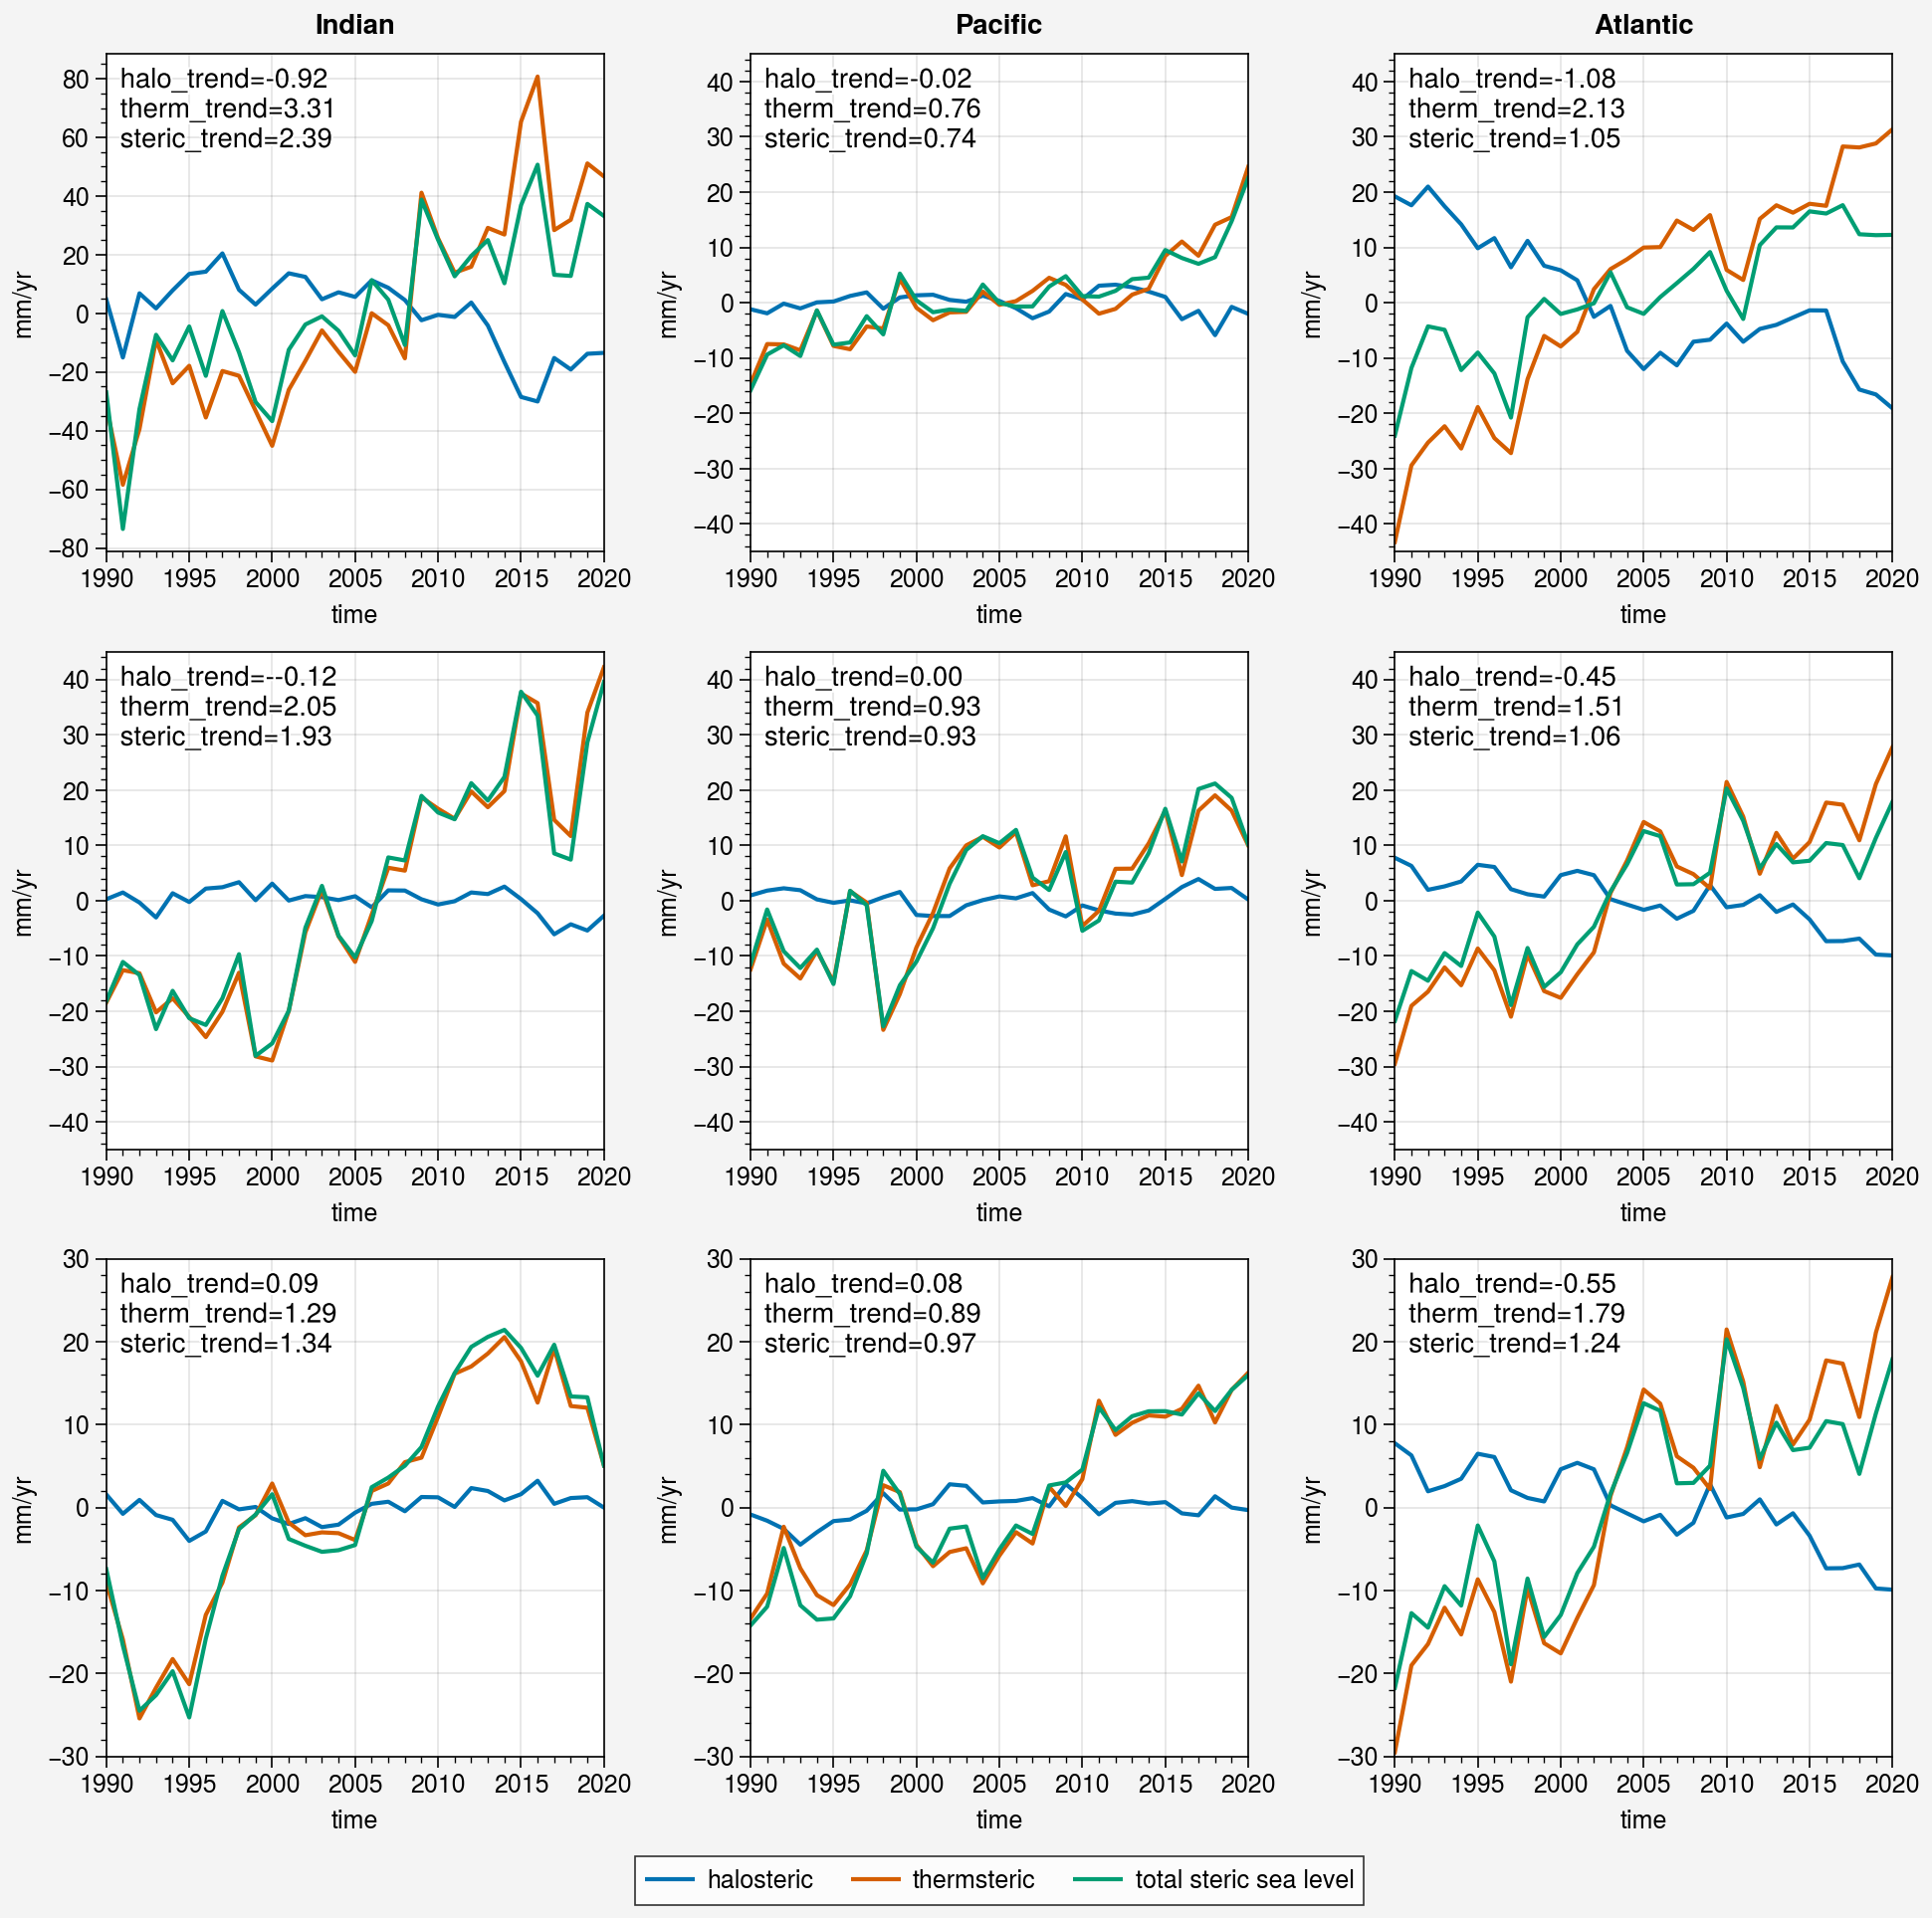

In [51]:
#SSSA

plot.rc.update({'fontsize':9})
fig, axs = plot.subplots(nrows=3,ncols=3,tight=True,sharex=False,sharey=False)
axs.format(collabels=['Indian','Pacific','Atlantic'])
label = ['halosteric','thermsteric','total steric sea level']

ax = axs[0,0]
ax.format(xlabel='time',ylabel='mm/yr',ultitle='halo_trend=-0.92 \ntherm_trend=3.31 \nsteric_trend=2.39')
for i in range(0,3):
    ax.plot(north_Indian[i],label=label[i])
    
ax = axs[0,1]
ax.format(xlabel='time',ylabel='mm/yr',ylim=(-45,45),ultitle='halo_trend=-0.02 \ntherm_trend=0.76 \nsteric_trend=0.74')
for i in range(0,3):
    ax.plot(north_Pacific[i],label=label[i])
    
ax = axs[0,2]
ax.format(xlabel='time',ylabel='mm/yr',ylim=(-45,45),ultitle='halo_trend=-1.08 \ntherm_trend=2.13 \nsteric_trend=1.05')
for i in range(0,3):
    ax.plot(north_Atlantic[i],label=label[i])
    
ax = axs[1,0]
ax.format(xlabel='time',ylabel='mm/yr',ylim=(-45,45),ultitle='halo_trend=--0.12 \ntherm_trend=2.05 \nsteric_trend=1.93')
for i in range(0,3):
    ax.plot(tropical_Indian[i],label=label[i])
    
ax = axs[1,1]
ax.format(xlabel='time',ylabel='mm/yr',ylim=(-45,45),ultitle='halo_trend=0.00 \ntherm_trend=0.93 \nsteric_trend=0.93')
for i in range(0,3):
    ax.plot(tropical_Pacific[i],label=label[i])
    
ax = axs[1,2]
ax.format(xlabel='time',ylabel='mm/yr',ylim=(-45,45),ultitle='halo_trend=-0.45 \ntherm_trend=1.51 \nsteric_trend=1.06')
for i in range(0,3):
    ax.plot(tropical_Atlantic[i],label=label[i])

ax = axs[2,0]
ax.format(xlabel='time',ylabel='mm/yr',ylim=(-30,30),ultitle='halo_trend=0.09 \ntherm_trend=1.29 \nsteric_trend=1.34')
for i in range(0,3):
    ax.plot(south_Indian[i],label=label[i])

ax = axs[2,1]
ax.format(xlabel='time',ylabel='mm/yr',ylim=(-30,30),ultitle='halo_trend=0.08 \ntherm_trend=0.89 \nsteric_trend=0.97')
for i in range(0,3):
    ax.plot(south_Pacific[i],label=label[i])

ax = axs[2,2]
ax.format(xlabel='time',ylabel='mm/yr',ylim=(-30,30),ultitle='halo_trend=-0.55 \ntherm_trend=1.79 \nsteric_trend=1.24')
all_legend=[]
for i in range(0,3):
    m = ax.plot(tropical_Atlantic[i],label=label[i])
    all_legend.append(m)
fig.legend(all_legend,center=True,loc='b')
fig.savefig('D:/steric_sea_level/fig/Basin_mean_time_plot.pdf',dpi=600,format='pdf')